In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
% matplotlib inline

from api_keys import api_key

from citipy import citipy



In [6]:
# generate the random lat and long values
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)

In [7]:
city_list = []

for i in range(len(lat)):
    # get the city name given the latitude and longitude
    city = citipy.nearest_city(lat[i], lng[i]).city_name
    
    # check city name if it is in our list
    if city not in city_list:
        # store the city name into a list
        city_list.append(city)

In [8]:
len(city_list)

607

In [9]:
# a set is a list of only unique values
unique_cities = len(list(set(city_list)))

## Perform the API Calls
* get the API key and form request for weather

In [10]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [11]:
# create empty list to store API call data
city_data = []

for i in range(len(city_list)):
    # try, except is used for error handling
    try:
        print("currently requesting city: ", city_list[i])
        # perform the API call and parse the data
        city_weather = requests.get(url + '&q=' + city_list[i]).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_temp = city_weather["main"]["temp_max"]
        city_name = city_weather["name"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        
        #'clouds': {'all': 75}
        #'wind': {'speed': 6.93, 'deg': 210},
        
        # save data to our list
        city_data.append({"City": city_name, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_temp,
                          "Humidity": city_humidity,
                          "Clouds": city_clouds,
                          "Wind": city_wind})
    except:
        print("city not found, skipping...", city_list[i])
        # skips the current iteration
        pass

currently requesting city:  saint-pierre
currently requesting city:  mataura
currently requesting city:  necochea
currently requesting city:  vao
currently requesting city:  malanje
currently requesting city:  isangel
currently requesting city:  hithadhoo
currently requesting city:  olinda
currently requesting city:  punta arenas
currently requesting city:  vaini
currently requesting city:  rikitea
currently requesting city:  kimbe
currently requesting city:  abu dhabi
currently requesting city:  bredasdorp
currently requesting city:  vikindu
currently requesting city:  hermanus
currently requesting city:  saleaula
city not found, skipping... saleaula
currently requesting city:  san andres
currently requesting city:  ushuaia
currently requesting city:  albany
currently requesting city:  manzhouli
currently requesting city:  apatou
currently requesting city:  oxford
currently requesting city:  nueva loja
currently requesting city:  bani
currently requesting city:  camocim
currently requ

In [12]:
sample_call = requests.get(url + '&q=' + city_list[0]).json()

In [13]:
sample_call

{'coord': {'lon': 4.24, 'lat': 48.95},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 61.61,
  'pressure': 1018,
  'humidity': 82,
  'temp_min': 60.8,
  'temp_max': 62.6},
 'visibility': 10000,
 'wind': {'speed': 5.82, 'deg': 360},
 'clouds': {'all': 0},
 'dt': 1534899600,
 'sys': {'type': 1,
  'id': 5604,
  'message': 0.0201,
  'country': 'FR',
  'sunrise': 1534913114,
  'sunset': 1534963538},
 'id': 2995603,
 'name': 'Saint-Pierre',
 'cod': 200}

In [14]:
sample_call["coord"]["lat"]

48.95

In [15]:
sample_call["main"]["temp_max"]

62.6

In [16]:
sample_call["weather"][0]

{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}

## Analysis
* make dataframe
* visualize the data
* save the plots

In [17]:
len(city_data)

531

In [18]:
# make the dataframe
df = pd.DataFrame(city_data)

In [28]:
df.head(531)

,City,Clouds,Humidity,Lat,Lng,Max Temp,Wind
0,Saint-Pierre,0,82,48.95,4.24,62.60,5.82
1,Mataura,36,93,-46.19,168.86,48.22,4.50
2,Necochea,0,69,-38.55,-58.74,42.01,11.77
3,Vao,0,65,59.10,26.19,53.44,10.65
4,Malanje,0,94,-9.54,16.35,61.54,4.38
5,Isangel,36,100,-19.55,169.27,72.88,13.67
6,Hithadhoo,100,100,-0.60,73.08,79.90,5.95
7,Olinda,0,73,-2.03,-79.75,73.40,14.99
8,Punta Arenas,75,75,-53.16,-70.91,41.00,2.24
9,Vaini,92,98,15.34,74.49,70.00,7.63


In [20]:
df.to_csv('data.csv')

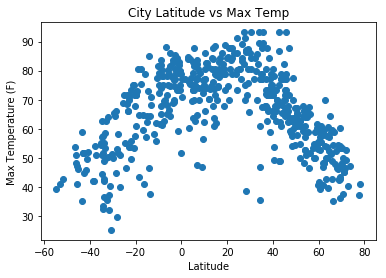

In [21]:
#Latitude vs Max Temp Scatter

plt.scatter(df["Lat"], df["Max Temp"])
plt.title("City Latitude vs Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')


plt.savefig("C:/Users/Sal/Desktop/Fig1.png")


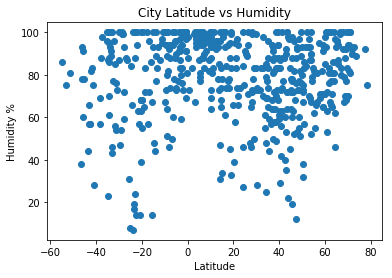

In [22]:
plt.scatter(df["Lat"], df["Humidity"])
plt.title("City Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')


plt.savefig("C:/Users/Sal/Desktop/Fig2.png")

In [65]:
city_weather

{'coord': {'lon': -56.22, 'lat': -34.68},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 48.2,
  'pressure': 1028,
  'humidity': 76,
  'temp_min': 48.2,
  'temp_max': 48.2},
 'visibility': 10000,
 'wind': {'speed': 6.93, 'deg': 210},
 'clouds': {'all': 75},
 'dt': 1534827600,
 'sys': {'type': 1,
  'id': 4623,
  'message': 0.0038,
  'country': 'UY',
  'sunrise': 1534846655,
  'sunset': 1534886324},
 'id': 3440963,
 'name': 'Progreso',
 'cod': 200}

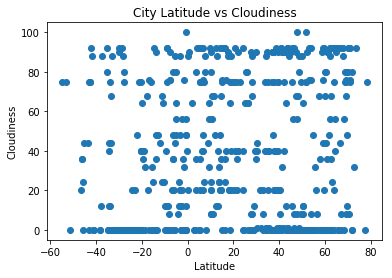

In [26]:
plt.scatter(df["Lat"], df["Clouds"])
plt.title("City Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


plt.savefig("C:/Users/Sal/Desktop/Fig3.png")

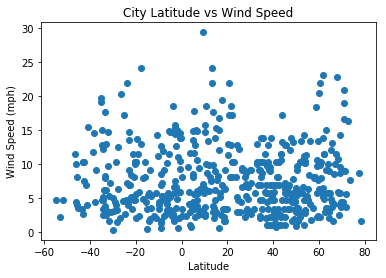

In [24]:
plt.scatter(df["Lat"], df["Wind"])
plt.title("City Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')


plt.savefig("C:/Users/Sal/Desktop/Fig4.png")